# Beta-Bernoulli Model


## Bernoulli Distribution

베르누이 분포는 동전던지기를 생각하면 쉽다. 동전을 던졌을 때, 결과는 2가지밖에 존재하지 않는다.

그리고 앞이 나온 사건(event)를 1이라고 하고 뒤가 나올 사건을 0이라고 하자.

동전을 던졌을때 앞이 나올확률이 0.51 뒤가 나올 확률이 0.49라고 가정하자.

이때 베르누이 분포는

$Bern(k|\theta) = \theta^k(1-\theta)^{(k-1)}$ for  $k=\{0,1\}$

로 표현할 수 있다. 여기서 $\theta$는 0.51이므로 앞이 나올 확률은

$Bern(1|0.51) = 0.51^1 \times 0.49^{(1-1)} = 0.51이다$ 


## Binomial Distribution

이항분포(Binomial Distribution)은 베르누이 시행을 여러번 했을 때의 분포를 의미한다.

이항분포는 다음과 같이 정의 된다. $N$번의 시행을 할때 어떤 사건이 $a$번 일어날 확률은

$B(a,\theta) = _NC_a \theta^{a}(1-\theta)^{N-a}$

로 정의된다. 여기서 $N - a$는 다른사건 $b$로 정의할수 있다.

N이 40이고 p=0.35인 Binomial Distribution을 그려보자.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.misc import comb

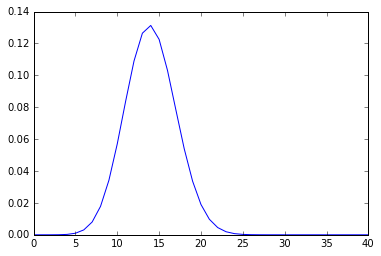

In [5]:
p = 0.35
x = np.arange(0,41)
y = comb(40, x) * np.power(p,x) * np.power(1-p, 40-x)
plt.plot(x,y)
plt.show()

평균은 $Np$이다

In [7]:
 np.sum(x*y)

14.0

데이터의 $E(x) = \sum x_ip(x_i)$가 이론적 평균인 $Np$와 일치하는 것을 확인할 수 있다.

이항분포는 PMF(Probability Mass Function)이지만 $N$이 충분이 크다고 가정할때 정규분포에 근사한다.

## Beta-Bernoulli Model

어떤 모집단이 Bernoulli Distribution을 따른다고 가정하자.

모집단에서 추출해 낸 데이터 역시 Bernoulli distribution을 따를 것이다. N번을 추출한다고 가정하자.

$X_1, \cdots , X_N = Bern(\theta)$

이때 $\theta$는 Beta Distribution을 따른다고 알려져 있다

$p(\theta) = Beta(a,b)$

Beta Distribution은 다음과 같이 정의 된다.

$Beta(a,b) = \frac {\theta^{a-1}(1-\theta)^{b-1}} {B(a,b)}$ where $B(a,b) = \frac {\Gamma(a) \Gamma(b)} {\Gamma(a+b)}$

이 때, $\Gamma(n+1) = n!$로 정의된다. 따라서 Beta Distribution을 잘 살펴보면 이항분포가 실수범위로 확장되었을 때임을 볼수 있다.

모집단에서 추출한 데이터 $D$일때 $\theta$의 확률은 베이지안 정리에 따라서

$p(\theta|D) = p(D|\theta)p(\theta)$  이므로

$p(\theta|D) = p(\theta) \cdot \Pi_{i=1}^{N}(X_i|\theta)$로 표현할 수 있다.

$p(\theta) \cdot \Pi_{i=1}^{N}(X_i|\theta) = \frac {1} {B(a,b)} \theta^{a-1}(1-\theta)^{b-1} \theta^{\sum I(X=1)} (1-\theta)^{\sum I(X=0)}$

이때 $I(X=1)$는 Indication function으로써, X가 1일때, 1을 0일때는 0을 반환한다. 즉 $\sum I(X=1)$은 사건 1이 일어난 횟수를 뜻한다.

그러므로 전체 $N$번의 추출에서 사건 1이 일어난 총 횟수를 $n_1$이라고 하고 사건 0이 일어난 횟수를 $n_0$이라고 하자. $n_1 + n_0 = N$이다.

따라서,

$p(\theta|D) = \frac {1} {B(a,b)}\theta^{a + n_1 -1} (1-\theta)^{b + n_0 -1} = Beta(a + n_1, b + n_0)$이다.

이것은 무슨 의미일까??

설명에 앞서, 예제를 보도록 하자. $a=b=2$인 Beta distribution을 prior로 가질때 베르누이 시행의 결과가 1이라고 하자

이는 아래와 같은 플롯을 그리게 된다.

In [10]:
from scipy.special import gamma, beta
def beta_dist(x,a,b):
    return (1/beta(a,b)) * np.power(x, a-1) * np.power(1-x, b-1)

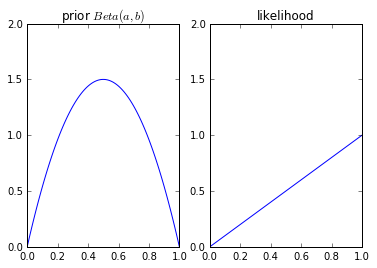

In [27]:
# beta prior
a = 2; b = 2
x = np.linspace(0,1,100)
beta_prior = beta_dist(x,a,b)
plt.subplot(121); plt.axis([0, 1, 0, 2]); plt.title("prior $Beta(a,b)$");
plt.plot(x, beta_prior)
#likelihood
likelihood = x
plt.subplot(122); plt.axis([0, 1, 0, 2]); plt.title("likelihood");
plt.plot(x, likelihood)
plt.show()

Posterior를 그려보고 $B(3,2)$를 그려보자.

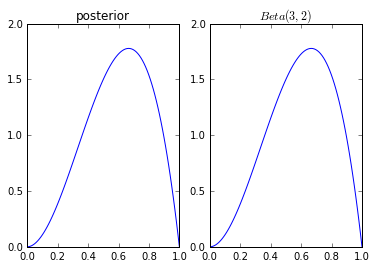

In [31]:
plt.subplot(121)
plt.plot(x, beta_prior * likelihood * 2)
plt.axis([0, 1, 0, 2]); plt.title("posterior")
plt.subplot(122)
plt.plot(x, beta_dist(x,3,2))
plt.axis([0, 1, 0, 2]); plt.title("$Beta(3,2)$")
plt.show()

(여기서 posterior에 2를 곱해준것은 $p(x)$가 $1/2$이기 때문이다.)

$Beta(3,2)$와 posterior가 완전히 동일하다는 것을 확인할 수 있다.

이것이 의미 하는 바는 이렇다. 

적은 수의 베르누이 시행으로 $\theta$를 결정하는 매우 불완전하다. 

따라서 $\theta$의 prior 분포인 beta distribution을 통하여 이런 시행에 일종의 보정을 더해줄 수 있고, 

그로 인해 posterior를 더 원래의 $\theta$에 가까운 값을 찾을 수 있도록 만들어준다.

그리고 위 예제 에서 보았듯이 원래 시행결과에 $a,b$를 더해주는 방법으로 보정이 가해진다. 

만일 베르누이 시행을 무한번 시행한다면 $\theta$는 원래 $\theta$와 같아질 것이다.

이 때, $a$,$b$를 Pseudocount라고 한다.

## Pseudocount

모집단이 베르누이 분포를 따른다고 할 때, 우리는 파라미터인 $\theta$의 값을 베르누이 시행을 반복하고 수행횟수로 나눔으로써 얻으려고 시도 한다.

그러나 우리의 관측은 항상 불완전하기 때문에, 단순 베르누이 시행의 관측값을 $N$으로 나누는 것으로는 $\theta$ 값을 정확히 구하지 못한다.

가령 "해가 뜸"이라는 사건을 생각해보자. 지구의 일생동안 "해가 뜸"이라는 사건은 지속적으로 발생해 왔다. 

그렇다고 해서 "내일 해가 뜸"을 보장할 수 있을까? "해가 뜨지 않음"이라는 사건이 여태까지 발생하지 않았을 뿐이다.

[라플라스](https://en.wikipedia.org/wiki/Pierre-Simon_Laplace)(Pierre-Simon Laplace, 1749.3.23 – 1827.3.5)는 이러한 의문에 대해서,

일어나지 않은 사건이라도 일어남을 가정해서(각각 한번씩을 더해서) 확률을 계산해야 된다고 주장했다.

즉 $p(해가 뜨지 않음) = (해가 뜨지 않은 횟수 + 1)/(해가 뜬 횟수 + 해가 뜨지 않은 횟수 + 2)$ 라고 계산해야 타당하다고 볼수 있다.

물론 해가 뜬 횟수가 압도적으로 많기에 해가 뜨지 않을 확률은 없다고 볼 수 있지만 훨씬 합리적인 모델이라고 볼 수 있다.